# CEE609 Research Project: Data download and pre-process code

Andrea Hoe and Melissa Yeung

Due 11/10/2024


# Import libraries

In [ ]:
%%capture

from PIL import Image
from matplotlib import gridspec
from google.colab import drive

import os
import urllib.request
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

drive.mount('/content/drive')

# 1. Load in a single image to see data structure




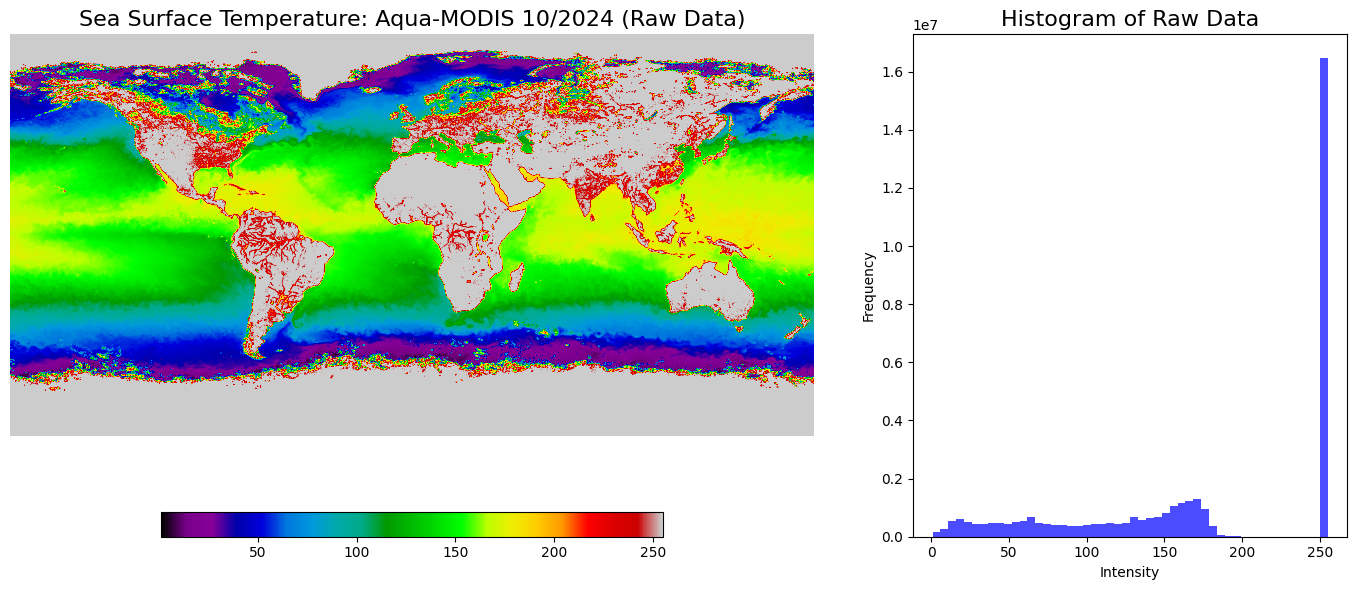

In [ ]:
url = "https://oceancolor.gsfc.nasa.gov/showimages/MODISA/IMAGES/SST/L3/2024/1001/AQUA_MODIS.20241001_20241031.L3m.MO.SST.sst.4km.NRT.nc.png";

image = Image.open(urllib.request.urlopen(url))
image_array = np.array(image)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [4, 2]})

im = ax1.imshow(image_array, cmap='nipy_spectral')
ax1.set_title("Sea Surface Temperature: Aqua-MODIS 10/2024 (Raw Data)", fontsize=16)
plt.colorbar(im, ax=ax1, orientation='horizontal', fraction=0.05)
ax1.axis('off')


ax2.hist(image_array.ravel(), bins=50, color='blue', alpha=0.7)
ax2.set_title("Histogram of Raw Data", fontsize=16)
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()



`The value 255 represents no data`

#### Replace elements that contain the value 255 with NaN since it represents no data.

In [ ]:
image_nan = np.where(image_array == 255, np.nan , image_array)
image_masked = np.ma.masked_invalid(image_nan)
image_masked = np.flipud(image_masked)

# create grid
sz = image_masked.shape
xv = np.arange(0, sz[1])
yv = np.arange(0, sz[0])
XG, YG = np.meshgrid(xv, yv)

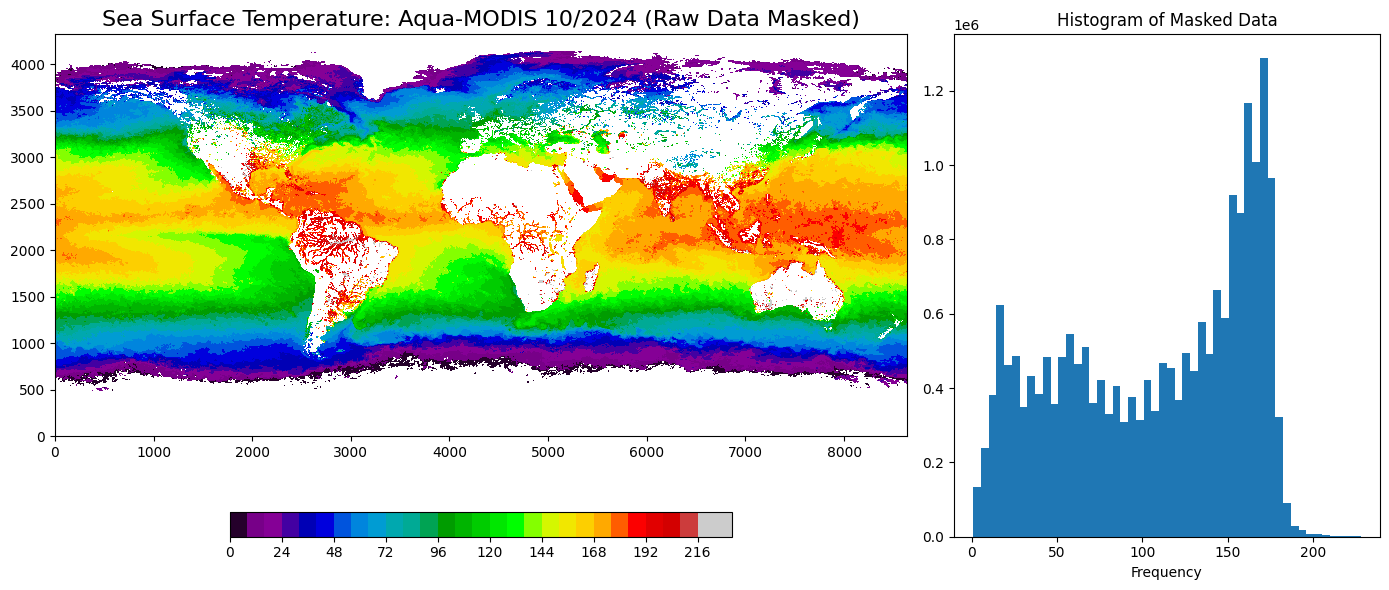

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [4, 2]})

contourf = ax1.contourf(XG, YG, image_masked, levels=30, cmap="nipy_spectral", vmin=0, vmax=220)
plt.colorbar(contourf, ax=ax1, orientation='horizontal', fraction=0.05)
ax1.set_title("Sea Surface Temperature: Aqua-MODIS 10/2024 (Raw Data Masked)", fontsize=16)

ax2.hist(image_masked.compressed(), bins=50)
ax2.set_xlabel("Frequency")
ax2.set_title("Histogram of Masked Data")

plt.tight_layout()
plt.show()

#### Find appropriate truncation for the Great Barrier Reef (GBR)

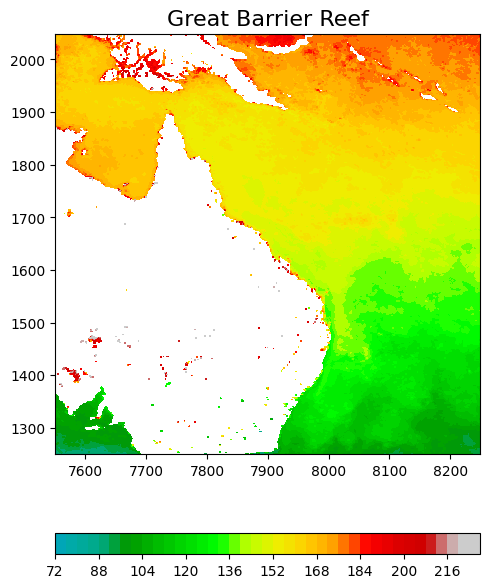

(800, 700)


In [ ]:
GBR_loc  = np.array([[1250,2050], [7550,8250]])

GBR  = image_masked[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]
xg_G = XG[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]
yg_G = YG[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]


fig, ax = plt.subplots(figsize=(5, 6))
contourf = ax.contourf(xg_G, yg_G, GBR, levels=50, cmap="nipy_spectral", vmin=0, vmax=220)
plt.colorbar(contourf, ax=ax, orientation='horizontal', fraction=0.05)
ax.set_title("Great Barrier Reef", fontsize=16)


plt.tight_layout()
plt.show()

print(GBR.shape)


# 2. Download full dataset
There are text files stored in the Google Drive. Each line of the .txt file contains a url to the corresponding .png. Below is an example of what the .txt files look like. The following code loops through multiple .txt files (one for each variable) and builds the truncated and masked numpy array for each variable. All variables are stacked into one array at the end.

Data is sampled monthly

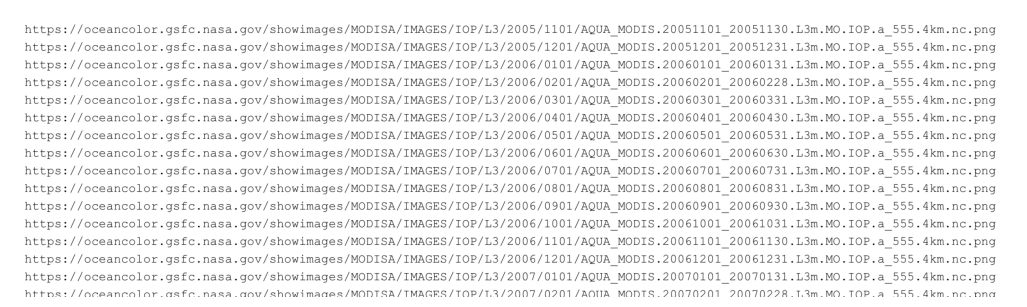

In [ ]:
img_path = 'drive/MyDrive/Fall 2024/CEE609/z_exTxt.png'
img = mpimg.imread(img_path)

plt.figure(figsize=(13, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

## Total absorption at 555nm (WLA)
**Instrument:** Aqua-MODIS

**Date Range:**
*   Great Barrier Reef: 11/01/2015 to 10/01/2018
*   Great Barrier Reef: 11/01/2021 to 10/01/2024


In [ ]:
path = 'drive/MyDrive/Fall 2024/CEE609/555_15-18.txt' #change#

# initialize
GBR_loc  = np.array([[1250,2050], [7550,8250]])
numFiles = 36
i        = 1
WLA18 = np.zeros(((GBR_loc[0,1]-GBR_loc[0,0]) * (GBR_loc[1,1]-GBR_loc[1,0]), numFiles)) #change#

# iterate
with open(path, 'r') as file:
  print('Iteration: ')
  for line in file:
    print(str(i), end=" ")

    del url, image, image_array, image_nan, image_masked, GBR, data_vect

    # extract url
    url = line.strip()

    # open image and convert to numpy array
    image = Image.open(urllib.request.urlopen(url))
    image_array = np.array(image)

    # mask out data
    image_nan = np.where(image_array == 255, np.nan , image_array)
    image_masked = np.ma.masked_invalid(image_nan)
    image_masked = np.flipud(image_masked)

    # truncate to reef
    GBR = image_masked[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]

    # reshape into column vector
    data_vect = GBR.reshape(-1, 1)

    WLA18[:, i-1] = data_vect.flatten() #change#

    i += 1

print('Done.')

np.save('drive/MyDrive/Fall 2024/CEE609/WLA18.npy' , WLA18) #change#






path = 'drive/MyDrive/Fall 2024/CEE609/555_21-24.txt' #change#

# initialize
GBR_loc  = np.array([[1250,2050], [7550,8250]])
numFiles = 36
i        = 1
WLA24 = np.zeros(((GBR_loc[0,1]-GBR_loc[0,0]) * (GBR_loc[1,1]-GBR_loc[1,0]), numFiles)) #change#

# iterate
with open(path, 'r') as file:
  print('Iteration: ')
  for line in file:
    print(str(i), end=" ")

    # extract url
    url = line.strip()

    # open image and convert to numpy array
    image = Image.open(urllib.request.urlopen(url))
    image_array = np.array(image)

    # mask out data
    image_nan = np.where(image_array == 255, np.nan , image_array)
    image_masked = np.ma.masked_invalid(image_nan)
    image_masked = np.flipud(image_masked)

    # truncate to reef
    GBR = image_masked[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]

    # reshape into column vector
    data_vect = GBR.reshape(-1, 1)

    WLA24[:, i-1] = data_vect.flatten() #change#

    i += 1

print('Done.')

np.save('drive/MyDrive/Fall 2024/CEE609/WLA24.npy' , WLA24) #change#

Iteration: 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 Done.
Iteration: 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 Done.


In [ ]:
# prompt: number of rows in WLA18 that have NaN

import numpy as np

WLA18 = np.load('drive/MyDrive/Fall 2024/CEE609/WLA18.npy')

nan_count_per_row = np.sum(np.isnan(WLA18), axis=1)
rows_with_nan = np.count_nonzero(nan_count_per_row)

print(f"Number of rows with NaN values in WLA18: {rows_with_nan}")

Number of rows with NaN values in WLA18: 319674


## Photosynthetic Available Radiation (PAR)
**Instrument:** Aqua-MODIS

**Date Range:**
*   Great Barrier Reef: 11/01/2015 to 10/01/2018
*   Great Barrier Reef: 11/01/2021 to 10/01/2024





In [ ]:
path = 'drive/MyDrive/Fall 2024/CEE609/PAR_15-18.txt' #change#

# initialize
GBR_loc  = np.array([[1250,2050], [7550,8250]])
numFiles = 36
i        = 1
PAR18 = np.zeros(((GBR_loc[0,1]-GBR_loc[0,0]) * (GBR_loc[1,1]-GBR_loc[1,0]), numFiles)) #change#

# iterate
with open(path, 'r') as file:
  print('Iteration: ')
  for line in file:
    print(str(i), end=" ")

    # extract url
    url = line.strip()

    # open image and convert to numpy array
    image = Image.open(urllib.request.urlopen(url))
    image_array = np.array(image)

    # mask out data
    image_nan = np.where(image_array == 255, np.nan , image_array)
    image_masked = np.ma.masked_invalid(image_nan)
    image_masked = np.flipud(image_masked)

    # truncate to reef
    GBR = image_masked[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]

    # reshape into column vector
    data_vect = GBR.reshape(-1, 1)

    PAR18[:, i-1] = data_vect.flatten() #change#

    i += 1

print('Done.')

np.save('drive/MyDrive/Fall 2024/CEE609/PAR18.npy' , PAR18) #change#






path = 'drive/MyDrive/Fall 2024/CEE609/PAR_21-24.txt' #change#

# initialize
GBR_loc  = np.array([[1250,2050], [7550,8250]])
numFiles = 36
i        = 1
PAR24 = np.zeros(((GBR_loc[0,1]-GBR_loc[0,0]) * (GBR_loc[1,1]-GBR_loc[1,0]), numFiles)) #change#

# iterate
with open(path, 'r') as file:
  print('Iteration: ')
  for line in file:
    print(str(i), end=" ")

    # extract url
    url = line.strip()

    # open image and convert to numpy array
    image = Image.open(urllib.request.urlopen(url))
    image_array = np.array(image)

    # mask out data
    image_nan = np.where(image_array == 255, np.nan , image_array)
    image_masked = np.ma.masked_invalid(image_nan)
    image_masked = np.flipud(image_masked)

    # truncate to reef
    GBR = image_masked[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]

    # reshape into column vector
    data_vect = GBR.reshape(-1, 1)

    PAR24[:, i-1] = data_vect.flatten() #change#

    i += 1

print('Done.')

np.save('drive/MyDrive/Fall 2024/CEE609/PAR24.npy' , PAR24) #change#

Iteration: 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 Done.
Iteration: 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 Done.


## Particulate Inorganic Carbon (PIC)
**Instrument:** Aqua-MODIS


**Date Range:**
*   Great Barrier Reef: 11/01/2015 to 10/01/2018
*   Great Barrier Reef: 11/01/2021 to 10/01/2024


In [ ]:
path = 'drive/MyDrive/Fall 2024/CEE609/PIC_15-18.txt' #change#

# initialize
GBR_loc  = np.array([[1250,2050], [7550,8250]])
numFiles = 36
i        = 1
PIC18 = np.zeros(((GBR_loc[0,1]-GBR_loc[0,0]) * (GBR_loc[1,1]-GBR_loc[1,0]), numFiles)) #change#

# iterate
with open(path, 'r') as file:
  print('Iteration: ')
  for line in file:
    print(str(i), end=" ")

    # extract url
    url = line.strip()

    # open image and convert to numpy array
    image = Image.open(urllib.request.urlopen(url))
    image_array = np.array(image)

    # mask out data
    image_nan = np.where(image_array == 255, np.nan , image_array)
    image_masked = np.ma.masked_invalid(image_nan)
    image_masked = np.flipud(image_masked)

    # truncate to reef
    GBR = image_masked[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]

    # reshape into column vector
    data_vect = GBR.reshape(-1, 1)

    PIC18[:, i-1] = data_vect.flatten() #change#

    i += 1

print('Done.')

np.save('drive/MyDrive/Fall 2024/CEE609/PIC18.npy' , PIC18) #change#






path = 'drive/MyDrive/Fall 2024/CEE609/PIC_21-24.txt' #change#

# initialize
GBR_loc  = np.array([[1250,2050], [7550,8250]])
numFiles = 36
i        = 1
PIC24 = np.zeros(((GBR_loc[0,1]-GBR_loc[0,0]) * (GBR_loc[1,1]-GBR_loc[1,0]), numFiles)) #change#

# iterate
with open(path, 'r') as file:
  print('Iteration: ')
  for line in file:
    print(str(i), end=" ")

    # extract url
    url = line.strip()

    # open image and convert to numpy array
    image = Image.open(urllib.request.urlopen(url))
    image_array = np.array(image)

    # mask out data
    image_nan = np.where(image_array == 255, np.nan , image_array)
    image_masked = np.ma.masked_invalid(image_nan)
    image_masked = np.flipud(image_masked)

    # truncate to reef
    GBR = image_masked[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]

    # reshape into column vector
    data_vect = GBR.reshape(-1, 1)

    PIC24[:, i-1] = data_vect.flatten() #change#

    i += 1

print('Done.')

np.save('drive/MyDrive/Fall 2024/CEE609/PIC24.npy' , PIC24) #change#

Iteration: 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 Done.
Iteration: 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 Done.


## Particulate Organic Carbon (POC)
**Instrument:** Aqua-MODIS


**Date Range:**
*   Great Barrier Reef: 11/01/2015 to 10/01/2018
*   Great Barrier Reef: 11/01/2021 to 10/01/2024


In [ ]:
path = 'drive/MyDrive/Fall 2024/CEE609/POC_15-18.txt' #change#

# initialize
GBR_loc  = np.array([[1250,2050], [7550,8250]])
numFiles = 36
i        = 1
POC18 = np.zeros(((GBR_loc[0,1]-GBR_loc[0,0]) * (GBR_loc[1,1]-GBR_loc[1,0]), numFiles)) #change#

# iterate
with open(path, 'r') as file:
  print('Iteration: ')
  for line in file:
    print(str(i), end=" ")

    # extract url
    url = line.strip()

    # open image and convert to numpy array
    image = Image.open(urllib.request.urlopen(url))
    image_array = np.array(image)

    # mask out data
    image_nan = np.where(image_array == 255, np.nan , image_array)
    image_masked = np.ma.masked_invalid(image_nan)
    image_masked = np.flipud(image_masked)

    # truncate to reef
    GBR = image_masked[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]

    # reshape into column vector
    data_vect = GBR.reshape(-1, 1)

    POC18[:, i-1] = data_vect.flatten() #change#

    i += 1

print('Done.')

np.save('drive/MyDrive/Fall 2024/CEE609/POC18.npy' , POC18) #change#






path = 'drive/MyDrive/Fall 2024/CEE609/POC_21-24.txt' #change#

# initialize
GBR_loc  = np.array([[1250,2050], [7550,8250]])
numFiles = 36
i        = 1
POC24 = np.zeros(((GBR_loc[0,1]-GBR_loc[0,0]) * (GBR_loc[1,1]-GBR_loc[1,0]), numFiles)) #change#

# iterate
with open(path, 'r') as file:
  print('Iteration: ')
  for line in file:
    print(str(i), end=" ")

    # extract url
    url = line.strip()

    # open image and convert to numpy array
    image = Image.open(urllib.request.urlopen(url))
    image_array = np.array(image)

    # mask out data
    image_nan = np.where(image_array == 255, np.nan , image_array)
    image_masked = np.ma.masked_invalid(image_nan)
    image_masked = np.flipud(image_masked)

    # truncate to reef
    GBR = image_masked[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]

    # reshape into column vector
    data_vect = GBR.reshape(-1, 1)

    POC24[:, i-1] = data_vect.flatten() #change#

    i += 1

print('Done.')

np.save('drive/MyDrive/Fall 2024/CEE609/POC24.npy' , POC24) #change#

Iteration: 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 Done.
Iteration: 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 Done.


## Chlorophyll Concentration (CHL)
**Instrument:** Aqua-MODIS


**Date Range:**
*   Great Barrier Reef: 11/01/2019

`Chlorophyll levels are what is to be predicted. Only one shapshot needed to train model.`

In [ ]:
path = 'drive/MyDrive/Fall 2024/CEE609/CHL_19.txt' #change#

# initialize
GBR_loc  = np.array([[1250,2050], [7550,8250]])
numFiles = 1
i        = 1
CHL19 = np.zeros(((GBR_loc[0,1]-GBR_loc[0,0]) * (GBR_loc[1,1]-GBR_loc[1,0]), numFiles)) #change#

# iterate
with open(path, 'r') as file:
  print('Iteration: ')
  for line in file:
    print(str(i), end=" ")

    # extract url
    url = line.strip()

    # open image and convert to numpy array
    image = Image.open(urllib.request.urlopen(url))
    image_array = np.array(image)

    # mask out data
    image_nan = np.where(image_array == 255, np.nan , image_array)
    image_masked = np.ma.masked_invalid(image_nan)
    image_masked = np.flipud(image_masked)

    # truncate to reef
    GBR = image_masked[GBR_loc[0,0]:GBR_loc[0,1], GBR_loc[1,0]:GBR_loc[1,1]]

    # reshape into column vector
    data_vect = GBR.reshape(-1, 1)

    CHL19[:, i-1] = data_vect.flatten() #change#

    i += 1

print('Done.')

np.save('drive/MyDrive/Fall 2024/CEE609/CHL19.npy' , CHL19) #change#


Iteration: 
1 Done.


`Data from 2015 to 2019 will be used to train the model`

`Data from 2021 to 2024 will be used to predict future state.`